# Using XGBoost to generate prediction models and find relevant features
This notebook uses the XGBoost algorithm in combination with the SHAP library in attempt to generate accurate predictions and to find useful features to reduce dimensionality for our downstream models.

### This custom class (stored in scripts) will handle the OHLCV pandas dataframe+indicators, create a prediction df, normalize, and optionally plot residuals and/or feature importances  
 

In [5]:
import sys
sys.path.append('../..scripts')

from xgboost_for_tickers import TickerXGBRegressor
import pandas as pd

## Analysis: Feature Importance  


### Example using MSFT data:

In [8]:
def preprocess(data):
    # keep feature data only
    data = data.iloc[:, 7:]
    data.columns = [c.lower() for c in data.columns]
    return data

# ticker = 'MSFT'
# df = pd.read_csv(f'../..data/ticker_data/{ticker}_full_data.csv')
# df= preprocess(df)

# modler = TickerXGBRegressor(df.copy())
# modler.predict_with_xgb(target='high', gsearch_params={
# 'max_depth': [2], 'learning_rate': [0.005], 'colsample_bytree': [0.75], 
# 'n_estimators': [500], 'objective': ['reg:squarederror'], 'gamma':[0]},
# normilization_type='log_return', test_size=0.2, timeframe=-1, scale_type='minmax')

# Paramater search for all tickers: Return on Close to next day High 
80% Train, 10% Validation, 10% Test (Labeled "Holdout Set" in code).   
Predict on log return of Close to next day high (potential exit point prediction), final predictions converted back to High price before calculating error metrics.  
Final metrics calculated and saved: MAPE, MAE, RMSE.

In [15]:
ticker_names = ['MSFT', 'HD', 'UNH', 'XOM', 'ADSK', 'WAT']

In [16]:
from os import listdir
listdir('../..data/ticker_data')

['ADSK_full_data.csv',
 'ADSK_reduced50.csv',
 'AMAT_full_data.csv',
 'CARR_full_data.csv',
 'HD_full_data.csv',
 'HD_reduced50.csv',
 'JNJ_full_data.csv',
 'MSFT_full_data.csv',
 'MSFT_reduced50.csv',
 'MTD_full_data.csv',
 'UNH_full_data.csv',
 'UNH_reduced50.csv',
 'V_full_data.csv',
 'WAT_full_data.csv',
 'WAT_reduced50.csv',
 'WFC_full_data.csv',
 'XOM_full_data.csv',
 'XOM_reduced50.csv']

In [17]:
ticker_model_dict = {'ticker_data':[], 'models':[]}
for data_name in ['MSFT', 'HD', 'UNH', 'XOM', 'ADSK', 'WAT']:
    ticker_model_dict['ticker_data'].append(preprocess(pd.read_csv(f'../..data/ticker_data/{data_name}_full_data.csv')))

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -5.343434321505151
Train Score: -3.0830813646514867

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.9973357979069783
Train Score: -2.267496853837437

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.2263107499295205
Train Score: -1.213632067413518

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -1.3964131596135334
Train Score: -0.7069475922007926

Testing {'colsample_bytree': 0.5, 'ga

Test Score: -0.3979655016191128
Train Score: 0.2283254173802568

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.223993349131208
Train Score: -1.157563666381229

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.23581857593272426
Train Score: 0.13768827332224953

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.18457606976637275
Train Score: 0.270565963670517

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.7388499315105888
Train Score: 0.316463351849982

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'ob

Test Score: -0.012580895446758555
Train Score: 0.1541489130000001

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.217481434608492
Train Score: -1.20779145612076

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2493483317087053
Train Score: 0.027724713092728392

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.028693715571740608
Train Score: 0.0933929759225458

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.02170323638861138
Train Score: 0.09353935852321138

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_esti

Test Score: -0.09353160637102453
Train Score: 0.044523233519933925

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.027582516678885005
Train Score: 0.06541524162866452

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -3.6239410574313453
Train Score: -2.04239862318542

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.8928719098107956
Train Score: -0.38839342484594286

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.0883034216834031
Train Score: 0.05556482661430462

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 

Test Score: -3.937723793634561
Train Score: -2.228565229332479

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.1496362619592815
Train Score: -1.1314566084511029

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -1.3347735617112564
Train Score: -0.5960441605635092

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -3.627057329482393
Train Score: -2.043260881501578

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.9284025269461083
Train Score: -0.3956386297504464

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimator

Test Score: -3.9839664294460446
Train Score: -2.2574944631594365

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.2061004341075137
Train Score: -1.1930417080906137

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -1.345233629774317
Train Score: -0.680008501220001

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -5.330846149152977
Train Score: -3.0770989803369213

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.9798098954877172
Train Score: -2.2474262328094032

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, '

Test Score: -2.1811744236776853
Train Score: -1.158799050507453

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.15137798975423955
Train Score: 0.08059572764439671

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.008124627722863043
Train Score: 0.14810593795391214

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.004924146968598997
Train Score: 0.15201157431636347

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -5.343440810736882
Train Score: -3.083007633136476

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1,

Test Score: -0.012192159845896722
Train Score: 0.06416605362129313

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.2064048262192424
Train Score: -1.2021560811232685

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.17980560522426114
Train Score: 0.006695158415532032

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.015186255128717852
Train Score: 0.06790848784384862

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.011411536556705126
Train Score: 0.06805531905618378

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth'

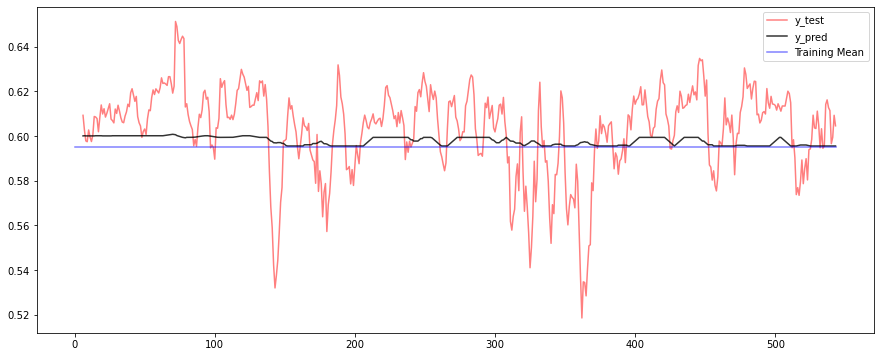

Final Holdout Error metrics saved: R^2: 0.0025. MAPE Unnormalized:1.1051%
GENERATING FEATURE IMPORTANCES...


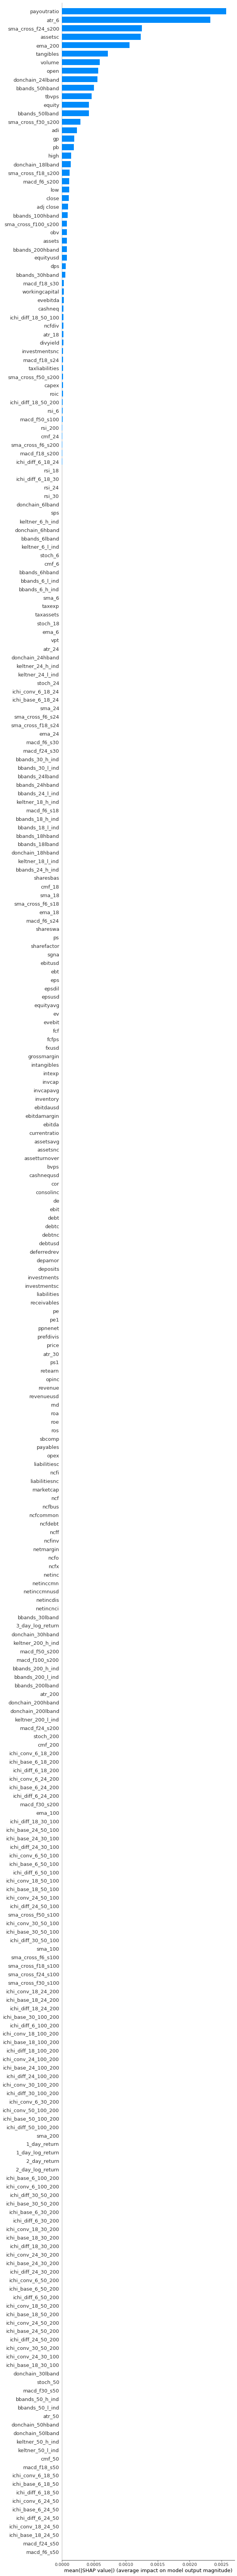

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -122.08120748656752
Train Score: -46.49964797589925

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -90.88522658085539
Train Score: -34.42598031188376

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -50.36624720931826
Train Score: -18.852093216221263

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -30.894321040953663
Train Score: -11.394645384466589

Testing {'colsample_bytree': 0.5, 'gam

Test Score: -0.31173930377537773
Train Score: 0.29187790249077816

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -54.12133937610087
Train Score: -18.692039538703956

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -5.104479132945962
Train Score: -0.6392522609944604

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -1.0775380593009496
Train Score: 0.36696438696363065

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -1.4244139561754525
Train Score: 0.4139173935887922

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 

Test Score: -0.16910348825579335
Train Score: 0.18365784444209377

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -50.145656073121415
Train Score: -18.76676598775126

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -2.790515910133383
Train Score: -0.8103217312502522

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.03444240097746176
Train Score: 0.11184172815242643

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.006138309066072267
Train Score: 0.11405302088101632

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_est

Test Score: -0.24104642678106036
Train Score: 0.05226121995727151

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -82.26416677259276
Train Score: -31.091835603424514

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -19.127538371893174
Train Score: -6.828808996922807

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -1.330799946585714
Train Score: -0.23681808016533323

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.24115760018722798
Train Score: 0.07769365236840853

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 4, 'n_

Test Score: -44.88041047999375
Train Score: -11.243229800049555

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -82.25205628797094
Train Score: -31.110042745031436

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -18.90502599762971
Train Score: -6.840436656460444

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -1.0796751509112124
Train Score: -0.20965711607657656

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.13483818852052054
Train Score: 0.12472749504076086

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimat

Test Score: -30.65250609412889
Train Score: -11.357538374543838

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -122.08119046040811
Train Score: -46.490125969268064

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -90.87095558830539
Train Score: -34.39477903079027

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -50.30478770130271
Train Score: -18.796075831591686

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -30.706287642948862
Train Score: -11.329241968646555

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n

Test Score: -0.024357863282536307
Train Score: 0.2040639180985635

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.004106911027597415
Train Score: 0.2081182861473888

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -122.08953721836122
Train Score: -46.49948432479363

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -90.85750884989781
Train Score: -34.425668171510445

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -50.33478051459021
Train Score: -18.851757274409405

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, '

Test Score: -3.042644589631383
Train Score: -0.8419250606410158

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.08926621126754553
Train Score: 0.07963668325822104

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.051360718147331896
Train Score: 0.08184639758835077

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -50.08682197303638
Train Score: -18.74625401174383

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.0424396248716263
Train Score: -0.8201399053819716

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_

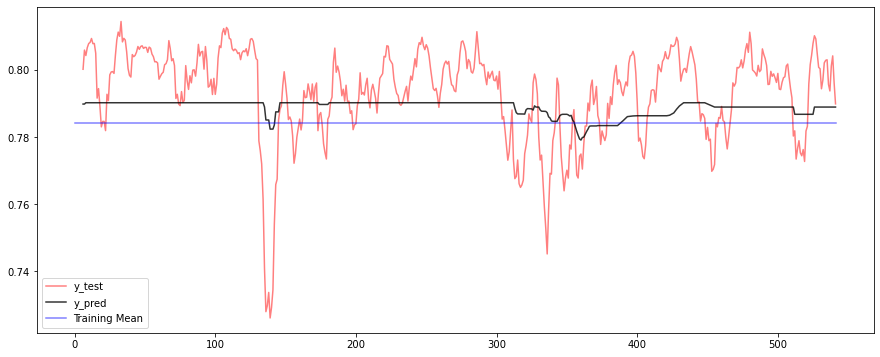

Final Holdout Error metrics saved: R^2: 0.0379. MAPE Unnormalized:1.087%
GENERATING FEATURE IMPORTANCES...


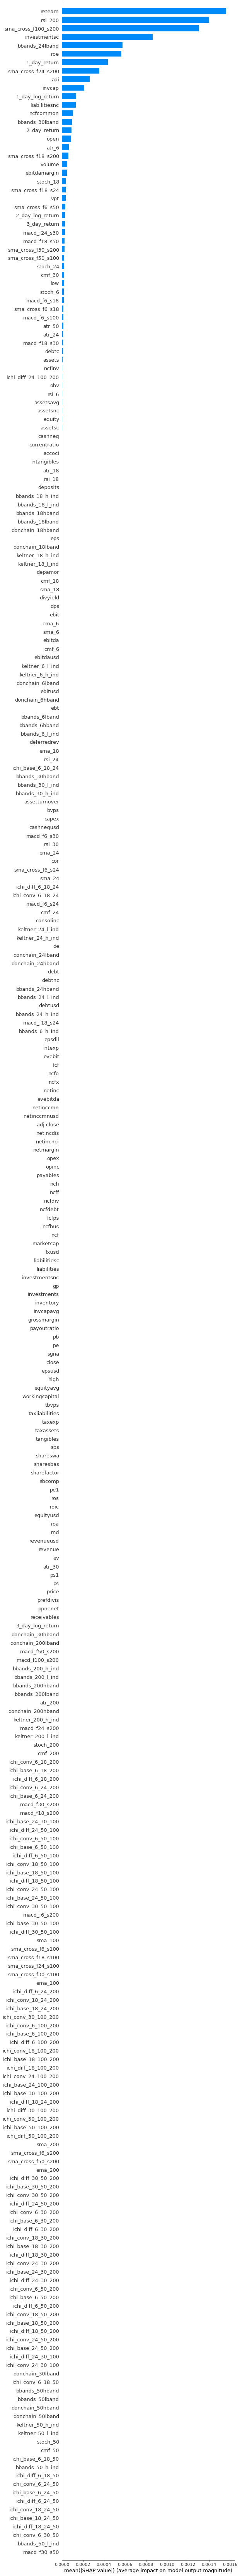

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.69493924020564
Train Score: -3.1015697320345996

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -5.030427028528102
Train Score: -2.2777092039940787

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.8653961917562936
Train Score: -1.212466974406789

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -1.8137585588746479
Train Score: -0.6990800223742981

Testing {'colsample_bytree': 0.5, 'gam

Test Score: -1.0586952964539362
Train Score: 0.2625306751516675

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.7568372098046914
Train Score: -1.1443746507649992

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.1984790801126015
Train Score: 0.17470839125415816

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.08163583944633146
Train Score: 0.3097650584905891

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.18938757577351595
Train Score: 0.3452745838923197

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50,

Test Score: -0.22641673134963658
Train Score: 0.21079674595677111

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.8468014563988064
Train Score: -1.2065400820972019

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.18557127854191102
Train Score: 0.0496971659569343

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.006121231891424772
Train Score: 0.12712897602294415

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.003747922014172067
Train Score: 0.1272767999326917

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_e

Test Score: -0.03614815810405769
Train Score: 0.10362738845533204

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -4.573368438395975
Train Score: -2.0333961263786176

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.1280748489220627
Train Score: -0.35748747771473566

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.11257743862094083
Train Score: 0.08943088213359174

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.03485230583460264
Train Score: 0.11138483617003203

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 4, 

Test Score: -2.0452680443287976
Train Score: -0.5856904498438957

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -4.563054448242184
Train Score: -2.0508515853269516

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.150924157051747
Train Score: -0.38278607672805753

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.07927541185461595
Train Score: 0.0986071799936239

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.008589364729131299
Train Score: 0.13902392241162387

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_esti

Test Score: -2.6454195084442826
Train Score: -0.6601389321209223

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.771176612564342
Train Score: -3.0940695524338153

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -5.281988129323337
Train Score: -2.251768056427912

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -3.4590914933357277
Train Score: -1.1641559540210715

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -2.651061932998813
Train Score: -0.6409873961220449

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n

Test Score: -0.3554115440985133
Train Score: 0.21419773416492438

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.34476961788063143
Train Score: 0.2166634120928237

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.692758195306056
Train Score: -3.1014072804632624

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -5.024308525749249
Train Score: -2.2773210718007384

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.861773546868528
Train Score: -1.2121446927721808

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n

Test Score: -0.22071641385065788
Train Score: 0.04164260275317555

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.021307703125441835
Train Score: 0.10584221421837703

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.016766108929894274
Train Score: 0.10663095217182161

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -2.8334095573575637
Train Score: -1.181073213244598

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.21664856927971576
Train Score: 0.04827874501058549

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3

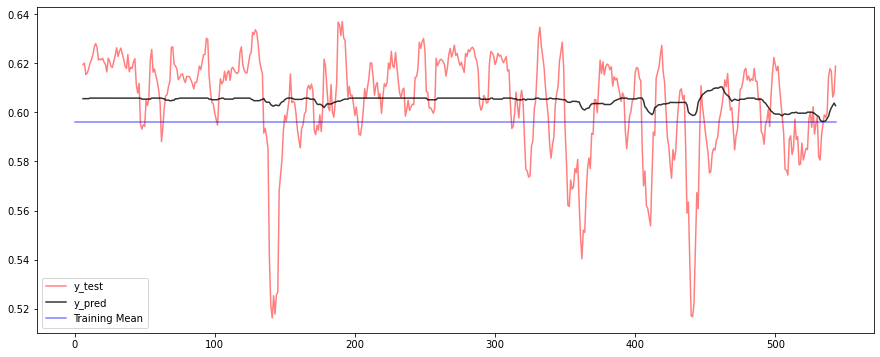

Final Holdout Error metrics saved: R^2: -0.0251. MAPE Unnormalized:1.1034%
GENERATING FEATURE IMPORTANCES...


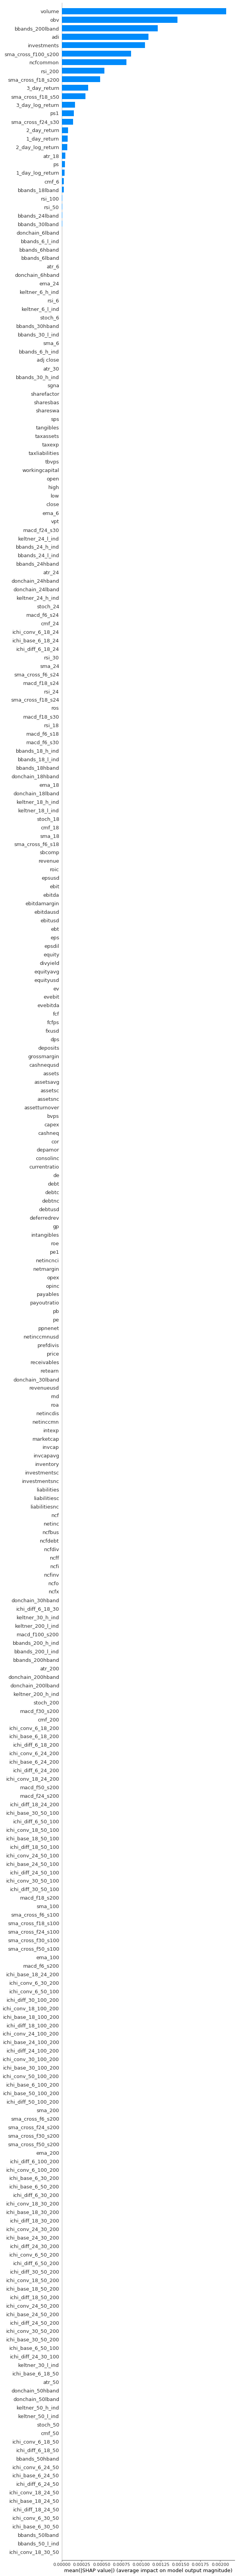

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -11.082330359710525
Train Score: -7.224879939619067

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -8.321357806687708
Train Score: -5.336711417885471

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -4.71610233993808
Train Score: -2.8987604889998515

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -2.9656621645382772
Train Score: -1.7289324879166301

Testing {'colsample_bytree': 0.5, 'gamm

Test Score: 0.012576496149140137
Train Score: 0.2783946100358423

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -4.600541441602067
Train Score: -2.805005387314227

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.23488513180307335
Train Score: 0.10350994632148303

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.026026915835070108
Train Score: 0.3289543368200095

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.021459786238515965
Train Score: 0.36737442784826535

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50

Test Score: -0.018604816138909408
Train Score: 0.16449040567619921

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -4.701889159785457
Train Score: -2.884892489922397

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.3241190851597511
Train Score: -0.04807642982145466

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.006673731358471713
Train Score: 0.10262351996219554

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.0008638631550552667
Train Score: 0.10296590189253285

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n

Test Score: -0.04977372233057675
Train Score: 0.07352279728960998

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -7.564644277183428
Train Score: -4.80104912676815

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.8838846974121193
Train Score: -0.9941127345266889

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.17896337179923605
Train Score: 0.029000741352344317

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.0497379101865445
Train Score: 0.07787981046162495

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 4, 'n_

Test Score: -2.8493777391721435
Train Score: -1.5821622126481887

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -7.567076006143047
Train Score: -4.817176039060164

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.8762189587374052
Train Score: -1.011417892824805

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.1400401380082441
Train Score: 0.05418316815752844

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.009854095352663794
Train Score: 0.12595707353623586

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estima

Test Score: -2.914507883800716
Train Score: -1.6718444502257337

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -11.067116159215148
Train Score: -7.214786915050613

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -8.27902361690154
Train Score: -5.301468952115092

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -4.645022207436933
Train Score: -2.8313322937922183

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -2.897470499759408
Train Score: -1.6532707925744128

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_es

Test Score: -0.0010156337160267537
Train Score: 0.1631216337614858

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.005348117899893645
Train Score: 0.16532867421947384

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -11.082454900135106
Train Score: -7.224710860868365

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -8.325397647787918
Train Score: -5.336140396243678

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -4.721382564484389
Train Score: -2.897828462191843

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, '

Test Score: -0.35911112680218227
Train Score: -0.06143784316876211

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.02543662357734755
Train Score: 0.0817497137819676

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.018430386431614876
Train Score: 0.08209328501987201

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -4.704068113918419
Train Score: -2.85887668782812

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.35944213053528173
Train Score: -0.06070765578309789

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 

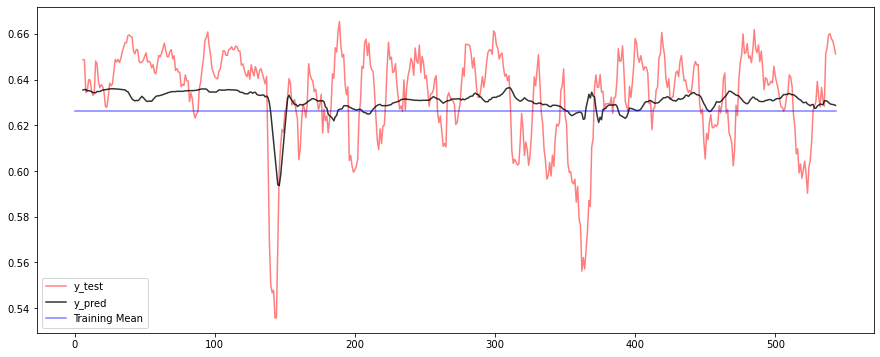

Final Holdout Error metrics saved: R^2: 0.0262. MAPE Unnormalized:1.4438%
GENERATING FEATURE IMPORTANCES...


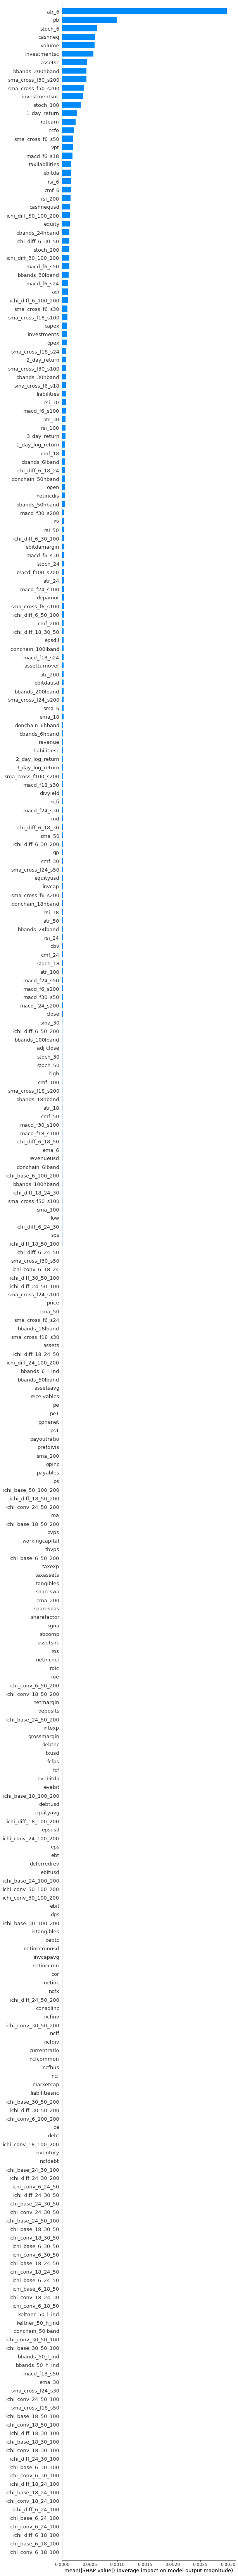

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -15.7627859713625
Train Score: -11.467316386306928

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.722969862587487
Train Score: -8.486027514363661

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -6.497339539118875
Train Score: -4.639689434986192

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -4.003172875362552
Train Score: -2.797278978482277

Testing {'colsample_bytree': 0.5, 'gamma'

Test Score: -0.07900865857593198
Train Score: 0.19011785135308046

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.734012163700995
Train Score: -4.571738463549477

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.9159014033016353
Train Score: -0.0505234881208243

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.21759111943402654
Train Score: 0.25243515226182867

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.3479484237447996
Train Score: 0.29668526854001587

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50

Test Score: -0.027780549775663355
Train Score: 0.1469123434974623

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.463197637777812
Train Score: -4.618602264921077

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.38922079739670656
Train Score: -0.17493072400930476

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.010433249243809062
Train Score: 0.052584066424841924

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.005554215266226459
Train Score: 0.05312938481297336

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n

Test Score: -0.19318767364448441
Train Score: -0.051996535219805295

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.04224911699321021
Train Score: 0.025581626935372803

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -10.593131214224078
Train Score: -7.654138455223778

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -2.513270696711293
Train Score: -1.669266452181832

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.19248160335790399
Train Score: -0.04448691558677442

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3,

Test Score: -7.853749842363058
Train Score: -4.564428982901181

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -5.572164423915742
Train Score: -2.692916156824368

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -10.605643244872173
Train Score: -7.666978285545127

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -2.4679777862002146
Train Score: -1.6712870685965626

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.1694071321323518
Train Score: -0.022323500819398268

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimato

Test Score: -6.478773014436357
Train Score: -4.624017324077702

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -3.938153175200582
Train Score: -2.7759793132143464

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -15.758087575089391
Train Score: -11.462506795316074

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.697526469995788
Train Score: -8.469588959669709

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -6.540515841808956
Train Score: -4.6076675116666

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_est

Test Score: -0.3714057053030986
Train Score: -0.08957078993821233

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.014129126833022143
Train Score: 0.14246857282917258

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.010547423961153157
Train Score: 0.14357208545570943

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -15.759163206839986
Train Score: -11.467214213201661

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.711448507861098
Train Score: -8.485783823039636

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth':

Test Score: -6.464732925308888
Train Score: -4.611578970627185

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.4225854822238557
Train Score: -0.19571288513534824

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.01925644258705006
Train Score: 0.03157254217820549

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.013114929962211086
Train Score: 0.03211803150120751

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -6.463013856449469
Train Score: -4.605033160249566

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_

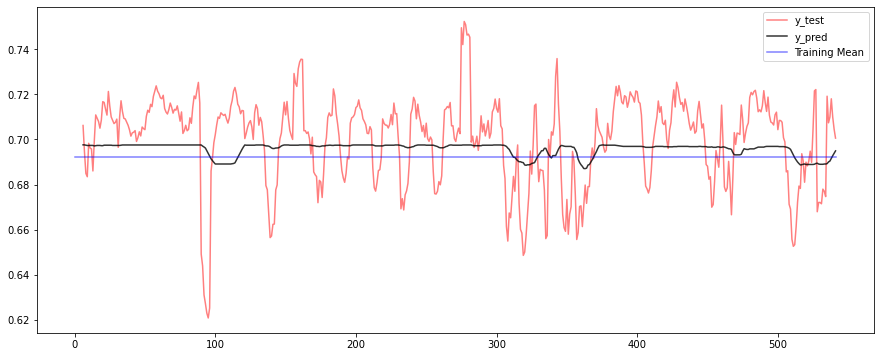

normilization_type: log_return 
target: low 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -145.9935749740068
Train Score: -62.458337674578424

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -108.98679287912482
Train Score: -46.248093178239884

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -60.78706348915379
Train Score: -25.341667314816014

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -38.1550700182581
Train Score: -15.33397660422106

Testing {'colsample_bytree': 0.5, 'gamm

Test Score: -7.352911910168256
Train Score: 0.29755599145254297

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -83.69025598556186
Train Score: -25.162681674959543

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -24.749205109726283
Train Score: -0.9562524170532525

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -16.10882455092318
Train Score: 0.3744350489382895

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -21.105116295418696
Train Score: 0.43231027247230414

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'o

Test Score: -3.353664900417858
Train Score: 0.17319598525000113

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -60.65290335409318
Train Score: -25.22673923843618

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -4.134913354235291
Train Score: -1.1528236362165538

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.2044456654100646
Train Score: 0.08552117000671167

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.143238464270375
Train Score: 0.08849012014298685

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators

Test Score: -0.3038456332974342
Train Score: 0.024744732361529964

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -98.93327777082371
Train Score: -41.7956818977768

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -23.176436715022458
Train Score: -9.22890526329993

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -1.7079651878160589
Train Score: -0.36894954112841893

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.3423032028465358
Train Score: 0.05711872468159407

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.005, 'max_depth': 4, 'n_est

Test Score: -66.54082616664256
Train Score: -15.204820083519234

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -98.69767653958387
Train Score: -41.796699513465256

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -24.10991903962465
Train Score: -9.224248566218298

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -2.2397382353539355
Train Score: -0.3452776124939798

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.7220868269276906
Train Score: 0.09145218943322087

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimator

Test Score: -45.482810338420414
Train Score: -15.308840854910521

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -146.3870318089776
Train Score: -62.45005412454423

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -116.23369129832416
Train Score: -46.219808816970655

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -75.23864454843172
Train Score: -25.29763132249712

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -50.34815924841925
Train Score: -15.27397895317712

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_e

Test Score: -2.050813146372763
Train Score: 0.19974505735564174

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -2.1402374045602173
Train Score: 0.21101085819514354

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -145.84706576525025
Train Score: -62.458294063065416

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -108.94630924678526
Train Score: -46.24803558290814

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -60.807181304304756
Train Score: -25.34416967981691

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 1, 'n

Test Score: -3.697843211725229
Train Score: -1.1804369927032776

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.10953301346596556
Train Score: 0.059346845716333974

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.06345269872950987
Train Score: 0.06231328310337503

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}...
Test Score: -60.38896052977252
Train Score: -25.22188113174511

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.621035895381312
Train Score: -1.169370621816567

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_es

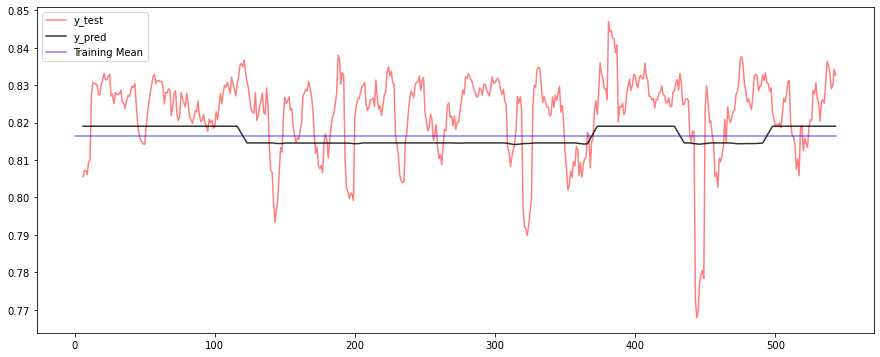

In [18]:
for df in ticker_model_dict['ticker_data']:
    modler = TickerXGBRegressor(df.copy())
    modler.predict_with_xgb(target='low', gsearch_params={
    'max_depth': [1,2,3,4], 'learning_rate': [0.001, 0.005, 0.01], 'colsample_bytree': [0.5, 0.75], 
    'n_estimators': [50, 200, 500, 750], 'objective': ['reg:squarederror'], 'gamma':[0, 0.1, 0.2]},
    normilization_type='log_return', test_size=0.2, timeframe=-1, scale_type='minmax')
    
    ticker_model_dict['models'].append(modler)

In [321]:
def extract_important_features(model_object, ticker_names, output_path, max_feature_length):
    """Extract SHAP important features and save to csv"""
    for i in range(len(ticker_names)):
        importances_dict = model_object[i].feature_importance_dict
        important_features = []
        for key, val in importances_dict.items():
            if val <= 0 or len(important_features) > max_feature_length:
                break  
            important_features.append(key)
        df = model_object[i].df.copy()
        df[important_features].to_csv(f"{output_path + ticker_names[i]}_reduced{max_feature_length}.csv")

In [322]:
# output_path = "../..data/ticker_data/"
# extract_important_features(ticker_model_dict['models'],ticker_names, output_path=output_path, max_feature_length=50)